In [5]:
import numpy as np

Task 1: Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [9]:
arr = np.random.sample((10, 3))
print(arr)
np.apply_along_axis(lambda x: x[np.argmin(abs(x - 0.5))], 1, arr)

[[0.4246833  0.83916963 0.17481642]
 [0.15617924 0.79166877 0.45755379]
 [0.99124072 0.99051713 0.65139114]
 [0.71988214 0.15087223 0.80070611]
 [0.20082128 0.22027461 0.07389861]
 [0.27948851 0.81690147 0.73929867]
 [0.30414027 0.82850144 0.98427639]
 [0.17457546 0.38091232 0.97663419]
 [0.31672718 0.62897218 0.22946382]
 [0.12646446 0.24685531 0.31448942]]


array([0.4246833 , 0.45755379, 0.65139114, 0.71988214, 0.22027461,
       0.27948851, 0.30414027, 0.38091232, 0.62897218, 0.31448942])

Task 2: Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [72]:
arr = np.array([[0.12375029, 0.08673548, 0.58528064, 0.31093784, 0.9016713,  0.67558126],
 [0.64713342, 0.85265352, 0.75125292, 0.62777817, 0.67585159, 0.2269463 ],
 [0.53502137, 0.35948824, 0.60103682, 0.75457409, 0.36935498, 0.41823614],
 [0.9650536,  0.55896091, 0.97733547, 0.53375154, 0.32821828, 0.10770335],
 [0.799046,   0.67861437, 0.03159145, 0.64622124, 0.15097979, 0.29136645],
 [0.15709404, 0.72858725, 0.78282085, 0.20436628, 0.28704645, 0.00699795]])
print(arr)
np.vectorize(lambda i: np.sum(arr[i, :]) / arr[np.argmin(arr[:, i]), i])(np.arange(6))

[[0.12375029 0.08673548 0.58528064 0.31093784 0.9016713  0.67558126]
 [0.64713342 0.85265352 0.75125292 0.62777817 0.67585159 0.2269463 ]
 [0.53502137 0.35948824 0.60103682 0.75457409 0.36935498 0.41823614]
 [0.9650536  0.55896091 0.97733547 0.53375154 0.32821828 0.10770335]
 [0.799046   0.67861437 0.03159145 0.64622124 0.15097979 0.29136645]
 [0.15709404 0.72858725 0.78282085 0.20436628 0.28704645 0.00699795]]


array([ 21.68848905,  43.59941191,  96.15613212,  16.98432418,
        17.20640425, 309.6496574 ])

Task 3: На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [91]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
np.max(x[1:][(x == 0)[:-1]])

5

Task 4: Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [102]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
np.vectorize(lambda j: np.count_nonzero(i == j) + x[j])(np.arange(10))

array([2., 2., 2., 2., 1., 4., 1., 1., 2., 1.])

Task 5: Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать только один цикл while (for).

In [252]:
def get_labels(obs, centers):
    return np.vectorize(lambda i: np.argmin(np.apply_along_axis(lambda c: np.linalg.norm(obs[i] - c), 1, centers)))(np.arange(obs.shape[0]))
    
def get_mean(obs, centers, labels):
    return sum(np.apply_along_axis(np.linalg.norm, 0, obs - centers[labels]))
    
def kmeans(obs, k_or_guess):
    eps = 0.01
    centers = np.array([])
    k = 0
    if (isinstance(k_or_guess, int) or isinstance(k_or_guess, np.int32)):
        centers = obs[np.random.randint(0, obs.shape[0], k_or_guess)]
        k = k_or_guess
    else:
        centers = obs[k_or_guess]
        k = k_or_guess.shape[0]
        
    labels = get_labels(obs, centers)
    old_mean = get_mean(obs, centers, labels)
    mean = old_mean
    
    while abs(mean - old_mean) > eps:
        old_mean = mean
        centers = np.vectorize(lambda i: np.sum(obs[labels == i]) / (obs[labels == i].shape[0]))(np.arange(k))
        labels = get_labels(obs, centers)
        mean = get_mean(obs, centers, labels)
        
    return (centers, mean)

С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

In [245]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:5]
data[:, 2:] = data[:, 2:].astype(int)
import matplotlib.pyplot as plt

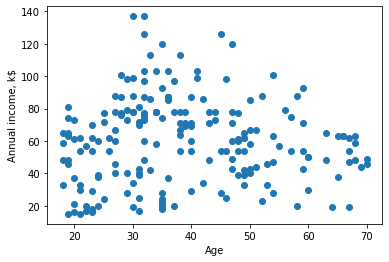

In [260]:
plt.scatter(data[:, 2], data[:, 3])
plt.xlabel("Age")
plt.ylabel("Annual income, k$")
plt.show()

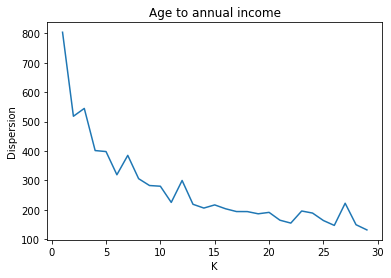

In [274]:
data_income = np.array([data[:, 2], data[:, 3]]).T
elbow = np.vectorize(lambda k: kmeans(data_income, k)[1])(np.arange(1, 30))
plt.plot(np.arange(1, 30), elbow)
plt.xlabel("K")
plt.ylabel("Dispersion")
plt.title("Age to annual income")
plt.show()

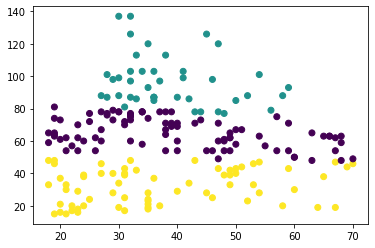

In [269]:
centers_income = kmeans(data_income, 3)[0]
labels_income = get_labels(data_income, centers_income)
plt.scatter(data_income[:, 0], data_income[:, 1], c = labels_income)
plt.show()

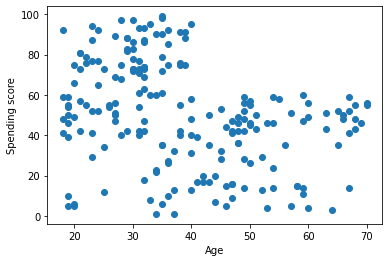

In [271]:
plt.scatter(data[:, 2], data[:, 4])
plt.xlabel("Age")
plt.ylabel("Spending score")
plt.show()

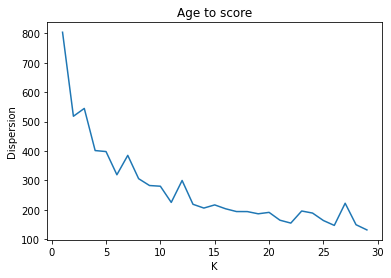

In [275]:
data_score = np.array([data[:, 2], data[:, 4]]).T
elbow_score = np.vectorize(lambda k: kmeans(data_score, k)[1])(np.arange(1, 30))
plt.plot(np.arange(1, 30), elbow)
plt.xlabel("K")
plt.ylabel("Dispersion")
plt.title("Age to score")
plt.show()

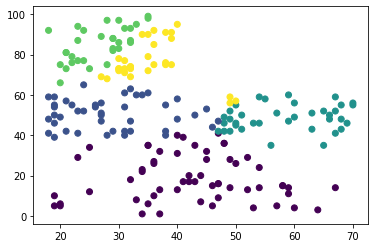

In [277]:
centers_score = kmeans(data_score, 5)[0]
labels_score = get_labels(data_score, centers_score)
plt.scatter(data_score[:, 0], data_score[:, 1], c = labels_score)
plt.show()